Welcome to the mobility notebook. This notebook does an in-depth analysis of the mobility of HPVs for carrying water. It uses the mobility_module.py package, this is where all of the models are stored.



In [1]:
# Importing necessary modules
import sys  # Provides access to some variables used by the interpreter
from pathlib import Path  # Used for filesystem path operations

# Resolve the current path of the notebook. Path().resolve() returns the absolute path
# of the current working directory (where this notebook is located).
notebook_path = Path().resolve()

# Determine the project root directory. Since 'notebook_path' points to the 'scripts'
# directory, its parent will be the root directory of your project (which contains both 'scripts' and 'src').
project_root = notebook_path.parent

# Append the project root directory to sys.path. This step is crucial as it allows
# Python to find and import modules from the 'src' directory, which is located at the project root.
# It essentially adds the project root to the list of directories where Python looks for modules.
sys.path.append(str(project_root))

# Importing standard and third-party libraries necessary for your script.
# These libraries are likely installed in your Conda environment or Python's site-packages.
import pandas as pd  # Data manipulation and analysis library
import plotly.express as px  # Simplified interface for Plotly

# Importing custom modules from the 'src' directory.
# Thanks to modifying sys.path, Python can now find these modules.
import src.mobility_module as mm  # Custom module for mobility-related functionalities



In [2]:
######################
#### Import Data #####
file_path_params = "../data/lookup tables/mobility-model-parameters.csv"
allHPV_param_df = pd.read_csv(file_path_params)

mo = mm.model_options()

Below, choose which model to use, 1 = Sprott, 2 = Cycling, 3 = walking 

In [3]:
# Setting model options based on user selection.
# This cell is responsible for configuring the behavior of the mobility model.
# The variable 'mo.model_selection' is set to a specific model type.
# Each number corresponds to a different model:
# 1 for the Sprott model, 2 for Cycling, and 3 for Walking.
mo.model_selection = 1  # Example: Selecting the Cycling model.


Apply data filtering based on the selected mobility model. This cell determines which subset of HPV data to use for analysis, ensuring the data aligns with the model requirements.

In [4]:
# Filtering HPV data based on the model selection.
# This cell applies filters to the HPV data to include only relevant data for the selected model.
# Different conditions are checked based on the model chosen in the previous cell.
# For model 1 (Sprott), all options are included.
# For model 2 (Cycling), a specific subset of data is used.
# For models greater than 2 (Walking), another subset of data is selected.
if mo.model_selection == 1:
    # Sprott model: Include all options.
    filter_col = -1
    filter_value = 1
elif mo.model_selection == 2:
    # Cycling model: Apply specific filter.
    filter_col = 5
    filter_value = 1
if mo.model_selection > 2:
    # Walking model: Another filter configuration.
    filter_col = 6
    filter_value = 0


Comment: Filter and select HPV data based on specified criteria. This cell determines the subset of HPV data to include in the analysis, ensuring it aligns with the specific conditions set by the chosen mobility model.

In [5]:
# Selecting specific Human-Powered Vehicles (HPVs) for analysis.
# Depending on the filter applied in the previous cell, this cell filters the HPV data.
# The filtered data is stored in 'param_df'.
# If 'filter_col' is greater than 0, a specific column from the data is used for filtering.
# Else, all data in 'allHPV_param_df' is used.
if filter_col > 0:
    column_names = [
        "Name",
        "LoadLimit",
        "AverageSpeedWithoutLoad",
        "Drive",
        "GroundContact",
        "Pilot",
        "Crr",
        "Efficiency",
        "Weight",
    ]  # 
    col = column_names[filter_col]
    param_df = allHPV_param_df.loc[(allHPV_param_df[col] == filter_value)]
else:
    param_df = allHPV_param_df  # Use all data if no filter is applied.



 Initialize and configure variables and models. This cell sets up the core components of the mobility analysis, preparing for the execution of mobility models and result handling.

In [6]:
# Initializing and setting up various variables and models for analysis.
# This cell creates instances of different classes defined in the mobility module.
# Each class instance represents a different aspect of the mobility model.
# 'mv' (model variables) captures general variables used across models.
# 'met' (MET values) encapsulates Metabolic Equivalent of Task values, relevant for human energy expenditure.
# 'hpv' (HPV variables) contains variables specific to Human-Powered Vehicles.
# 'mr' (model results) is used for storing and handling results of the mobility model calculations.
mv = mm.model_variables()
met = mm.MET_values(mv)
hpv = mm.HPV_variables(param_df, mv)
mr = mm.model_results(hpv, mo)


In [7]:
# Customizing the scenario by modifying specific variables. Only used for creating custom scenarios.

export_lookup_table = 0
if export_lookup_table == 1:
    # change crr for different scenarios
    hpv.Crr[0][0][0] = 0.004

Execute the selected mobility model and store results. This cell runs the chosen mobility model (Sprott or numerical) and captures the output in terms of vehicle velocity and load capacities.

In [8]:
# Executing the mobility model based on the previously set configurations.
# The cell differentiates between the Sprott model and other numerical models.
# Based on 'model_selection', the appropriate mobility model function is called.
# The results of the model (velocity and load matrices) are stored in 'mr'.
if mo.model_selection == 1:
    # Execute the Sprott model for model_selection 1.
    mr.v_load_matrix3d, mr.load_matrix3d = mm.mobility_models.sprott_model(hpv, mv, mo, mr)
elif mo.model_selection > 1:
    # Execute the numerical mobility model for other selections.
    mr.v_load_matrix3d, mr.load_matrix3d = mm.mobility_models.numerical_mobility_model(mr, mv, mo, met, hpv)



 Prepare and organize results for analysis. This cell configures the conditions for analyzing the results from the mobility models and loads the results accordingly for subsequent visualization or export.

In [9]:

# Organizing and preparing the results from the mobility model for analysis.
# This cell sets up the conditions under which the results are to be analyzed.
# It includes setting the 'slope_scene', which might represent a particular scenario or condition in the analysis.
# The results are then loaded and prepared for further processing or visualization.
mo.slope_scene = 0  # Example: Setting the slope scene to 0.
mr.load_results(hpv, mv, mo)  # Loading the results for the specified conditions.



 Visualize model results using interactive plots. This cell creates various types of plots to display the outcomes of the mobility analysis, making the data more accessible and understandable.

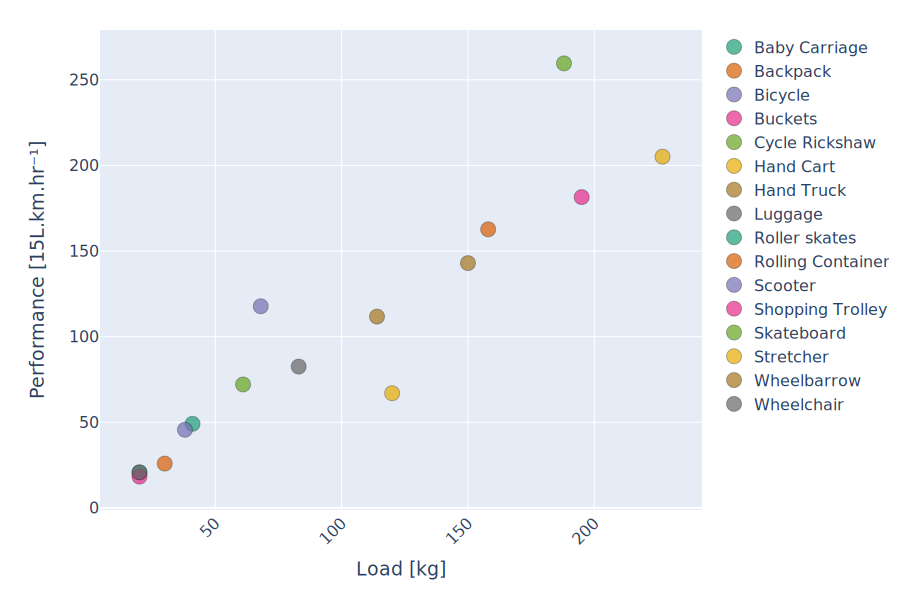

/home/james/Documents/GitHub/water_access/src/mobility_module.py:1420: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/james/Documents/GitHub/water_access/src/mobility_module.py:1420: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/james/Documents/GitHub/water_access/src/mobility_module.py:1420: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/james/Documents/GitHub/water_access/src/mobility_module.py:1420: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/james/Documents/GitHub/water_access/src/mobility_module.py:1420: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version

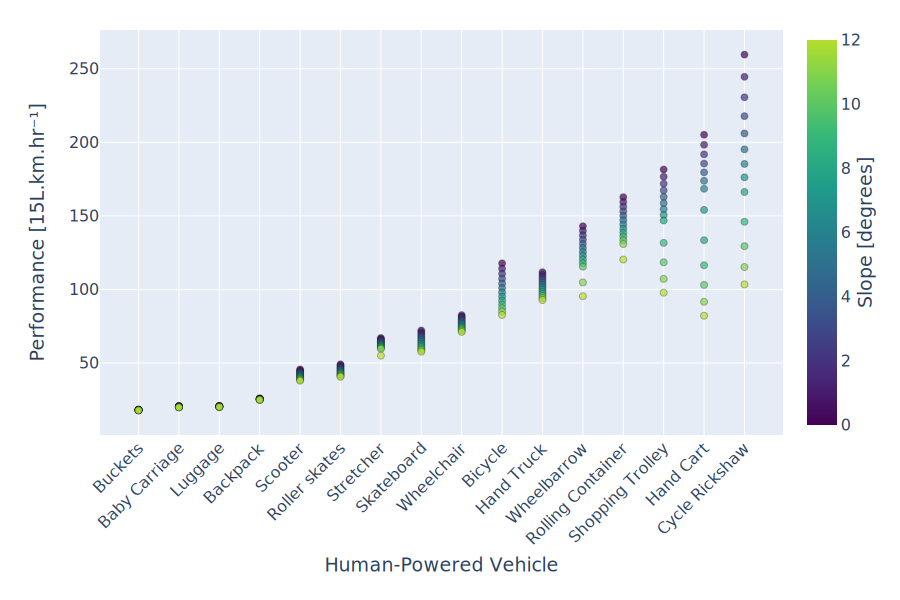

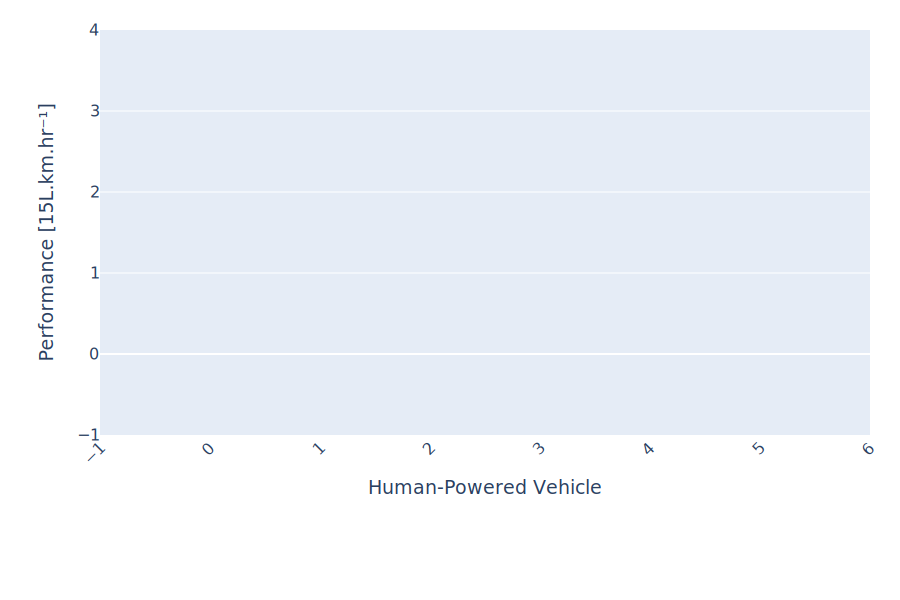

In [10]:
# Visualization of results using Plotly for interactive plots.
# Utilizes custom plotting functions defined in the mobility module to create visual representations of the results.
# Different types of plots (like load plots, bar plots, slope plots) are generated based on the results.
# These plots help in understanding and interpreting the data and outcomes of the mobility models.
mm.plotting_hpv.load_plot_plotly(mr, mo, hpv)  # Generating a load plot.
# mm.plotting_hpv.bar_plot_loading_distance(mr, mo, hpv, mv)  # Creating a bar plot for loading distance.
mm.plotting_hpv.scatter_plot_loading_distance(mr, mo, hpv, mv)  # Creating a bar plot for loading distance.
# mm.plotting_hpv.slope_plot_plotly(mr, mo, hpv)  # Producing a slope plot.
mm.plotting_hpv.new_slope_plot(mr, mo, hpv, mv)  # Producing a slope plot.
mm.plotting_hpv.bar_plot_hpvs(mr, mo, hpv, mv)  # Generating a bar plot for HPVs.


Export results to a CSV file for external use. This cell checks if the export feature is enabled and, if so, formats the relevant data into a DataFrame and saves it as a CSV file for further use.

In [11]:
# Optional export of tabular results to a CSV file.
# If 'export_table' is set to 1, the efficiency data for a particular scenario is formatted into a DataFrame and saved as a CSV.
# This feature allows for external analysis or sharing of the results.
export_table = 0  # Set to 1 to enable exporting.
if export_table == 1:
    slope_name = mr.slope_vector_deg.flat[mo.slope_scene]  # Extracting the slope name for the title.
    chart_title = f"Efficiency at {slope_name:.2f} degrees, with model {mr.model_name}"  # Formatting chart title.
    df = mr.create_dataframe_single_scenario(hpv, mv, mo.load_scene, mo.slope_scene)  # Creating DataFrame for export.
    df.to_csv("efficiency.csv")  # Exporting the DataFrame to a CSV file.


In [12]:

    # This  cell creates a lookup table for a given Crr.
    # The rows are it's slope and then the loaded and unloaded velocity is given for each slope.
    # Load is held constant




export_lookup_table = 0
if export_lookup_table == 1:   
    load_v = mr.v_load_matrix3d[
        0, :, -1
    ]

    unload_v = mr.v_unload_matrix3d[
        0, :, -1
    ]

    load_vector= mr.load_matrix3d[
        0, :, -1
    ]

    slope_vector = mr.slope_matrix3d_deg[
        0, :, -1
    ]

    filename_string = f'{mr.hpv_name[0][0][0][0]}_Crr_{hpv.Crr[0][0][0]}'

    # create a dataframe with the data
    df = pd.DataFrame(
        {
            "slope_vector": slope_vector,
            "load_v": load_v,
            "unload_v": unload_v,
            "load_matrix": load_vector,
        }
    )
    # setindex slope
    df.set_index("slope_vector", inplace=True)

    # save the dataframe to a csv
    df.to_csv(f'../data/{filename_string}.csv')



IndentationError: expected an indented block (3049750528.py, line 10)